## HW Supervised Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('dataset/youtube_statistics.xlsx')
df.sample(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
27188,2018-04-22,Nela Ticket Movie Teaser | Ravi Teja | Malvika...,SRT Entertainments,24,03:30:16,"Nela Ticket Movie Teaser|""Ravi Teja""|""Malvika ...",149893,9603,258,913,False,False,False,Nela Ticket Movie Teaser on SRT Entertainments...,23,1163,91,2018-04-22
23612,2018-03-28,Non deep fried Batata vada | बिना तला हुआ आलू ...,Nisha Madhulika,26,05:25:53,"Potato Bonda|""Batata vada""|""Perfect Restaurant...",333581,5063,358,1261,False,False,False,"Vada Pav Recipe, Crispy aloo bonda, Vada pav ...",17,2365,77,2018-03-26
32432,2018-05-21,MAHABHARATAM 10 | Karna Challenges Arjuna | Ho...,Vikram Aditya,24,02:42:02,"MAHABHARATAM 10|""Karna Challenges Arjuna""|""How...",240080,5792,402,2267,False,False,False,"MAHABHARATAM 10, Karna Challenges Arjuna. How ...",16,1152,96,2018-05-18


## Description Analisys

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [5]:
numeric_col= df.select_dtypes(include=['int64']).columns
object_col = df.select_dtypes(include=['object']).columns
bool_col = df.select_dtypes(include=['bool']).columns
date_time_col = df.select_dtypes(include=['datetime64[ns]']).columns

In [6]:
print("Numeric Columns:")
display(df[numeric_col].describe().map('{:.2f}'.format).T)
print("Object Columns:")
display(df[object_col].describe())
print("Boolean Columns:")
display(df[bool_col].describe())
print("Date Time Columns:")
display(df[date_time_col].describe())

Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


Object Columns:


,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


Boolean Columns:


,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


Date Time Columns:


,publish_date
count,36791
mean,2018-02-24 11:20:36.334973440
min,2017-05-27 00:00:00
25%,2017-12-31 00:00:00
50%,2018-02-23 00:00:00
75%,2018-04-23 00:00:00
max,2018-06-13 00:00:00


## Univariate Analisys

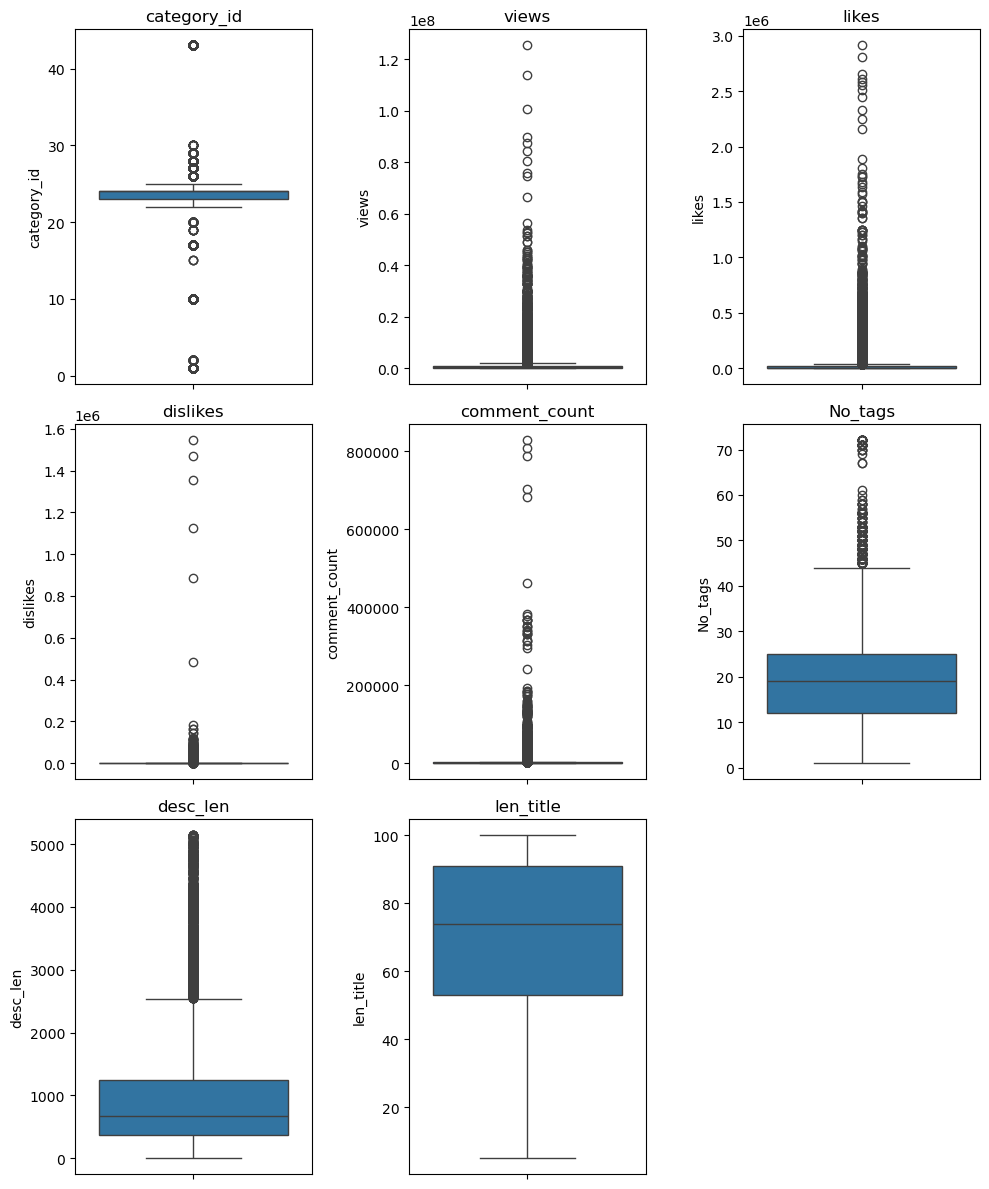

In [7]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
df[numeric_col].describe().map('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


In [8]:
# IQR, min, max, quantile 90%, text setiap kolom numerik
for col in numeric_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    min_val = df[col].min()
    max_val = df[col].max()
    q90 = df[col].quantile(0.9)
    print(f"{col} - Min: {min_val}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, 90th Quantile: {q90},Max: {max_val}")

category_id - Min: 1, Lower Bound: 21.5, Upper Bound: 25.5, 90th Quantile: 25.0,Max: 43
views - Min: 4024, Lower Bound: -895937.25, Upper Bound: 1828172.75, 90th Quantile: 2038234.0,Max: 125432237
likes - Min: 0, Lower Bound: -18945.0, Upper Bound: 33919.0, 90th Quantile: 54194.0,Max: 2912710
dislikes - Min: 0, Lower Bound: -1275.5, Upper Bound: 2416.5, 90th Quantile: 2876.0,Max: 1545017
comment_count - Min: 0, Lower Bound: -1764.25, Upper Bound: 3161.75, 90th Quantile: 4175.0,Max: 827755
No_tags - Min: 1, Lower Bound: -7.5, Upper Bound: 44.5, 90th Quantile: 32.0,Max: 72
desc_len - Min: 3, Lower Bound: -935.5, Upper Bound: 2540.5, 90th Quantile: 1995.0,Max: 5136
len_title - Min: 5, Lower Bound: -4.0, Upper Bound: 148.0, 90th Quantile: 98.0,Max: 100


## Multivariate Analisys

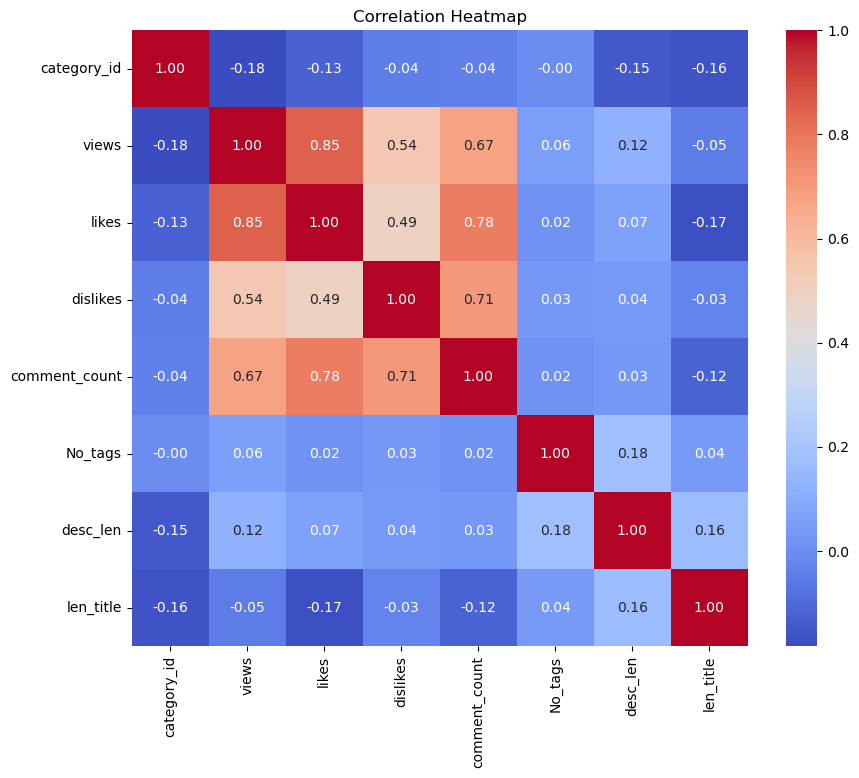

In [9]:
# HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_col].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## DATA CLEANSING

In [20]:
df_clean = df.copy()

In [15]:
df_clean.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [ ]:
df_clean.dropna(subset=['description'], inplace=True)

In [22]:
df_clean

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,19,818,100,2018-06-13
36787,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",8,468,26,2018-06-13
36788,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,False,False,False,Subscribe to Mazhavil Manorama now for your da...,8,2187,57,2018-06-13
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,False,False,False,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13
